In [1]:
# multi class clasificatioin 

In [2]:
# 784 input layer-->28x28 pixels 
# 10 output perceptrons-> multi class clasifications

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [4]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [6]:
xtrain.shape #60k images with each being 28x28 pixels as numopy array

(60000, 28, 28)

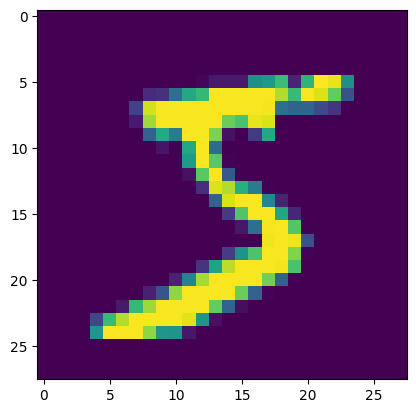

In [9]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0]) # 28 x 28 pixels stored as numpy array

In [10]:
# pixel values lies from 0 to 255 in the array
# first standardize it bringing the range form 0 to 1
xtrain=xtrain/255
xtest=xtest/255
xtrain[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
# firstly we need to flatten the data 28x28 into 784 
model=Sequential()
model.add(Flatten(input_shape=(28,28)))# 2d to 1d
model.add(Dense(128,activation='relu'))# 2d to 1d
model.add(Dense(10,activation='softmax'))# 10 nodes--->softmax used when multiclass
# clasiification is used
model.summary() 

c:\Users\ASUS\OneDrive\Desktop\DL\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
# training the model
history=model.fit(xtrain,ytrain,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9987 - loss: 0.0045 - val_accuracy: 0.9786 - val_loss: 0.1254
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9987 - loss: 0.0045 - val_accuracy: 0.9759 - val_loss: 0.1317
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9984 - loss: 0.0048 - val_accuracy: 0.9758 - val_loss: 0.1401
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9990 - loss: 0.0029 - val_accuracy: 0.9783 - val_loss: 0.1297
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.9737 - val_loss: 0.1544
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9976 - loss: 0.0075 - val_accuracy: 0.9766 - val_loss: 0.1393
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9733 - val_loss: 0.1708
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9985 - loss: 0.0051 - 

In [45]:
ypred=model.predict(xtest)# as probabiltiy
ypred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[9.4238863e-16, 1.2237546e-22, 2.4759080e-14, ..., 1.0000000e+00,
        2.1181713e-15, 5.1859342e-08],
       [1.3703011e-20, 2.7495168e-11, 1.0000000e+00, ..., 6.0838397e-33,
        5.9408666e-18, 7.4510811e-28],
       [2.9964694e-12, 9.9999249e-01, 2.1278063e-06, ..., 3.7976247e-07,
        4.9707228e-06, 2.9572495e-14],
       ...,
       [1.0417663e-28, 3.8427211e-29, 5.1059254e-30, ..., 2.7986584e-12,
        6.0245807e-17, 1.1697699e-11],
       [3.6448106e-23, 7.8718473e-24, 4.3917756e-28, ..., 3.5571665e-20,
        1.5904455e-11, 1.0845472e-28],
       [6.1136693e-24, 9.3602429e-34, 2.9312869e-26, ..., 1.1981511e-28,
        2.9880442e-24, 1.0617171e-29]], shape=(10000, 10), dtype=float32)

In [46]:
from sklearn.metrics import accuracy_score
import numpy as np

In [47]:
y_pred = model.predict(xtest)          # shape = (n_samples, num_classes)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(ytest, y_pred_classes)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test Accuracy: 0.975


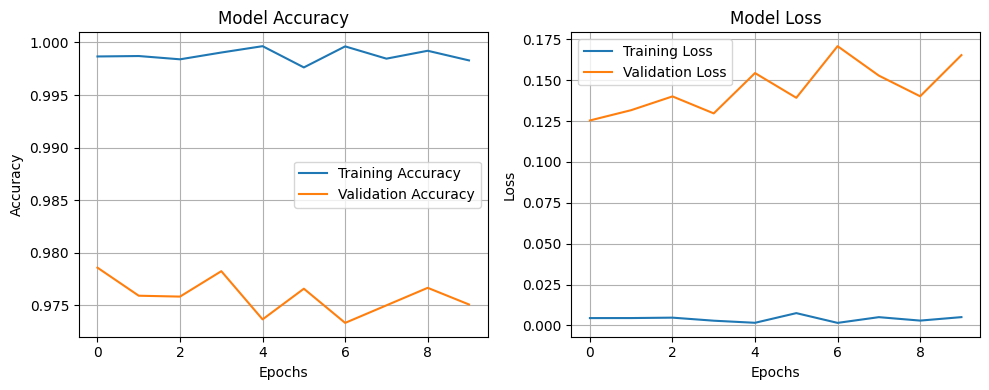

In [50]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


2


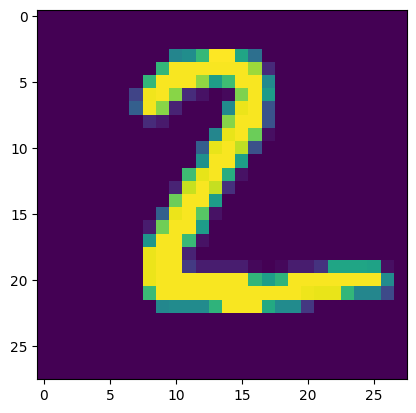

In [56]:
plt.imshow(xtest[1])
print(ytest[1])

In [58]:
model.predict(xtest[1].reshape(1,28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1.3702908e-20, 2.7495221e-11, 1.0000000e+00, 2.1501462e-18,
        0.0000000e+00, 2.2048299e-21, 1.1495979e-22, 6.0839326e-33,
        5.9408438e-18, 7.4511095e-28]], dtype=float32)

In [ ]:
import numpy as np

# Predict probability for one image
y_pred = model.predict(xtest[1].reshape(1, 28, 28))

# Convert to discrete output (class label)
predicted_class = np.argmax(y_pred)

print("Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Class: 2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Class: 7


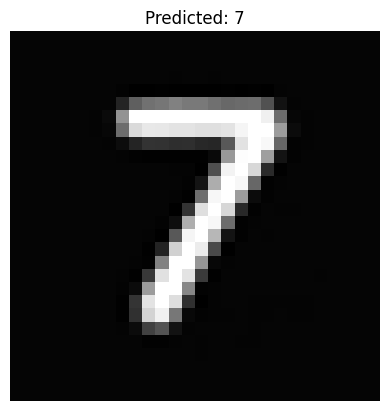

In [73]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

# 1️⃣ Load the image from your local system
img_path = 'C:/Users/ASUS/Downloads/elt.png'
img = Image.open(img_path).convert('L')  # 'L' converts it to grayscale

# 2️⃣ Resize it to match your model's input
img = img.resize((28, 28))

# 3️⃣ Convert to numpy array
img_array = np.array(img)

# 4️⃣ Normalize pixel values to [0,1]
img_array = img_array / 255.0

# 5️⃣ Reshape to (1, 28, 28)
img_array = img_array.reshape(1, 28, 28)

# 6️⃣ Predict
y_pred = model.predict(img_array)

# 7️⃣ Get the discrete output
predicted_class = np.argmax(y_pred)
print("Predicted Class:", predicted_class)

# 8️⃣ Optional: Visualize the image
plt.imshow(img_array.reshape(28,28), cmap='gray')
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()
